<a href="https://colab.research.google.com/github/emontesw/DATA_ANALYTICS_DATA_SCIENCE/blob/main/PROYECTO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROYECTO 1

PROGRAMA ESPECIALIZADO CIENCIA DE DATOS CON  PYTHON

DATA & ANALYTICS 

MCB ENRIQUE MONTES WONG

Ejercicio N°1:
Escribir una función que devuelva un Hexágono.

In [ ]:
# import the turtle modules
#import turtle 
!pip3 install ColabTurtle

  Created wheel for ColabTurtle: filename=ColabTurtle-2.1.0-py3-none-any.whl size=7657 sha256=bfb7db093b13fecd34394210386ceb641bb941a7626f11bc2cced96859e26e0f
  Stored in directory: /root/.cache/pip/wheels/0d/ab/65/cc4478508751448dfb4ecb20a6533082855c227dfce8c13902
Successfully built ColabTurtle


In [ ]:
from ColabTurtle.Turtle import *
import ColabTurtle.Turtle as tim 

def hexagono():
  #Posiciona el cursor en un punto de inicio 
  initializeTurtle()
  penup()
  goto(300,20)
  pendown()
  tim.right(90)

  for i in range(6):
    #Realiza el dibujo del Hexágono
    angle = 360 / 6
    tim.forward(100) #Dimensión de cada lado del hexágono 
    tim.right(angle) #Angulo de giro hacia la derecha del cursor 

hexagono()

Ejercicio 2

Generar un Notebook Colab con código y resultados, con el
siguiente fichero autos.csv que contiene información de autos de
un periodo de tiempo. Resolver los siguientes: 

- Limpieza y tratamiento de las variables

- Generar 6 nuevas variables aplicando los siguientes criterios
con las variables numéricas:

Log10(var1/var2)

Sqrt(var1)exp(var2)/200

Si var 1 > var 2 → 5, caso contrario 3

1/logn(var1/var2)*100

var2**2/var1

- Generar  3  variables  cualitativas  ordinales  con  los  siguientes criterios:

Si  es  mayor  a  la  “media  +  1*desviación  estándar”  → Alto 

Si  está  entre  “media  -  1*desviación  estándar”  y “media + 1*desviación estándar” → Medio 

Si  es  menor  a  la  “media  -  1*desviación  estándar”  → Bajo 

Nota: Mostrar con las nuevas variables generadas.           

Elegir con libertad las variables a trabajar.

- Crear  una  función  que  muestre  los  siguientes  gráficos  para las variables numéricas según una variable numérica:

Cajas y bigotes 

Barras de la media 

Histograma con Curva

- Crear  una  función  que  devuelva  un  mapa  de  calor  con  la correlación  de  todas  las  variables  numéricas  (incluye  las generadas), para cada país.


In [ ]:
#cargamos la data desde nuestra PC
from google.colab import files
files.upload()


Saving autos_1.2.csv to autos_1.2 (1).csv


{'autos_1.2.csv': b"Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,A\xc3\xb1o,Caballo_De_Fuerza\r\n18,8,USA,3504,307,12,chevrolet chevelle malibu,01/01/1970,130\r\n15,8,USA,3693,350,11.5,buick skylark 320,01/01/1970,165\r\n18,8,USA,3436,318,11,plymouth satellite,01/01/1970,150\r\n16,8,USA,3433,304,12,amc rebel sst,01/01/1970,150\r\n17,8,USA,3449,302,10.5,ford torino,01/01/1970,140\r\n15,8,USA,4341,429,10,ford galaxie 500,01/01/1970,198\r\n14,8,USA,4354,454,9,chevrolet impala,01/01/1970,220\r\n14,8,USA,4312,440,8.5,plymouth fury iii,01/01/1970,215\r\n14,8,USA,4425,455,10,pontiac catalina,01/01/1970,225\r\n15,8,USA,3850,390,8.5,amc ambassador dpl,01/01/1970,190\r\nNA,4,Europe,3090,133,17.5,citroen ds-21 pallas,01/01/1970,115\r\nNA,8,USA,4142,350,11.5,chevrolet chevelle concours (sw),01/01/1970,165\r\nNA,8,USA,4034,351,11,ford torino (sw),01/01/1970,153\r\nNA,8,USA,4166,383,10.5,plymouth satellite (sw),01/01/1970,175\r\nNA,8,USA,3850,360,11,amc reb

In [ ]:
#IMPORTACION DE LIBRERIAS 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import missingno as msno

In [ ]:
!pip install missingno

In [ ]:
#levantamos la data con pandas
data_auto = pd.read_csv('autos_1.2.csv')
#data_auto
data_auto.head()

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Año,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,01/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,01/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,01/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,01/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,01/01/1970,140.0


In [ ]:
#INFORMACION GENERAL DE DATAFRAME Y DATOS FALTANTES 
data_auto.info()
pd.DataFrame(data_auto.isna().sum(), columns = ['Perdidos'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Año                406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB


,Perdidos
Millas_Por_Galon,8
Cilindros,0
Pais_Origen,0
Peso_En_Libras,0
Desplazamiento,0
Aceleracion,0
Nombre,0
Año,0
Caballo_De_Fuerza,6


In [ ]:
#LLENADO DE DATOS FALTANTES 
data_auto.fillna(method="backfill", inplace = True) #Los datos faltantes fueron llenados con el dato anterior 
pd.DataFrame(data_auto.isna().sum(), columns = ['Perdidos']) #Se verifica que ya ho existan Datos Faltantes 

,Perdidos
Millas_Por_Galon,0
Cilindros,0
Pais_Origen,0
Peso_En_Libras,0
Desplazamiento,0
Aceleracion,0
Nombre,0
Año,0
Caballo_De_Fuerza,0


- Generar 6 nuevas variables aplicando los siguientes criterios
con las variables numéricas:

Log10(var1/var2)

Sqrt(var1)exp(var2)/200

Si var 1 > var 2 → 5, caso contrario 3

1/logn(var1/var2)*100

var2**2/var1

In [ ]:
import numpy as np

# Agregar COLUMNA 1 (C1) con la fómula: Log10(var1/var2)

data_auto["C1"] = np.log10(data_auto["Millas_Por_Galon"]/data_auto["Cilindros"]).round(2)

# Agregar COLUMNA 2 (C2) con la fómula: Sqrt(var1)exp(var2)/200
 
data_auto["C2"] = (np.sqrt(data_auto["Millas_Por_Galon"]) * np.exp(data_auto["Cilindros"])/200).round(2)

# Agregar COLUMNA 3 (C3) con la fómula: Si var 1 > var 2 → 5, caso contrario 3

data_auto["C3"] = np.where(data_auto["Millas_Por_Galon"] > data_auto["Cilindros"],5,3)

# Agregar COLUMNA 4 (C4) con la fómula: 1/logn(var1/var2)*100

data_auto["C4"] = ((1/(np.log(data_auto["Millas_Por_Galon"]/data_auto["Cilindros"])))*100).round(2)

# Agregar COLUMNA 5 (C5) con la fómula: var2**2/var1

data_auto["C5"] = ((data_auto["Cilindros"]**2)/data_auto["Millas_Por_Galon"]).round(2)
#data_auto["C5"] = ((1/(np.log(data_auto["Millas_Por_Galon"]/data_auto["Cilindros"])))*100).round(2)

#data_auto
data_auto.head()

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Año,Caballo_De_Fuerza,C1,C2,C3,C4,C5
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,01/01/1970,130.0,0.35,63.24,5,123.32,3.56
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,01/01/1970,165.0,0.27,57.73,5,159.08,4.27
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,01/01/1970,150.0,0.35,63.24,5,123.32,3.56
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,01/01/1970,150.0,0.30,59.62,5,144.27,4.00
4,17.0,8,USA,3449,302.0,10.5,ford torino,01/01/1970,140.0,0.33,61.45,5,132.67,3.76


- Generar  3  variables  cualitativas  ordinales  con  los  siguientes criterios:

Si  es  mayor  a  la  “media  +  1*desviación  estándar”  → Alto 

Si  está  entre  “media  -  1*desviación  estándar”  y “media + 1*desviación estándar” → Medio 

Si  es  menor  a  la  “media  -  1*desviación  estándar”  → Bajo 

Nota: Mostrar con las nuevas variables generadas.           

Elegir con libertad las variables a trabajar.

In [ ]:
import numpy as np

#data_auto["C5"][0]

def estadistico (columna):
  """ Obtner la Media y la Desv Std de la columna"""
  return np.mean(columna), np.std(columna)

def condicional(columna,x,desv):
  """ Genera un array con las condionales de acuerdo a la media y Desv Std de la columna a analizar """
  #aux = np.array
  aux = []

  for i in range(len(columna)):
    #print(columna[i])
    
    if columna[i] > x + desv :
      aux.append("Alto")
    
    elif columna[i] < x + desv and columna[i] > x - desv:
      aux.append("Medio")

    else:
      aux.append("Bajo")

  #return(aux)
  return np.array(aux)


#COLUMNA A ANALIZAR

#EN ESTE EJEMPLO COLOQUE LA COLUMNA "Millas_Por_Galon" y "Cilindros"

columna = data_auto["Millas_Por_Galon"]

#columna = data_auto["Cilindros"]

#columna = data_auto["Millas_Por_Galon"][:4]

#print(columna)



#OBTENER LA MEDIA Y LA DESV STD DE LA COLUMNA A ANALIZAR 

x , desv = estadistico(columna)

#print("Media de la columna: ", x)
#print("La Desv Std de la columna: ", desv)



#OBTENER LA CONDIONAL DE ACUERDO A LA COLUMNA, LA MEDIA Y LA DESV STD. 

aux = condicional(columna,x,desv)
#print(aux)
#print("Dimension de aux: ", len(aux))




#AGREGAR EL ARRAY AUX AL DATAFRAME; COLUMNA 6 (C6) 

data_auto["C6"] = aux

data_auto


,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Año,Caballo_De_Fuerza,C1,C2,C3,C4,C5,C6
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,01/01/1970,130.0,0.35,63.24,5,123.32,3.56,Medio
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,01/01/1970,165.0,0.27,57.73,5,159.08,4.27,Bajo
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,01/01/1970,150.0,0.35,63.24,5,123.32,3.56,Medio
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,01/01/1970,150.0,0.30,59.62,5,144.27,4.00,Medio
4,17.0,8,USA,3449,302.0,10.5,ford torino,01/01/1970,140.0,0.33,61.45,5,132.67,3.76,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,01/01/1982,86.0,0.83,1.42,5,52.37,0.59,Medio
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,01/01/1982,52.0,1.04,1.81,5,41.70,0.36,Alto
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,01/01/1982,84.0,0.90,1.54,5,48.09,0.50,Alto
404,28.0,4,USA,2625,120.0,18.6,ford ranger,01/01/1982,79.0,0.85,1.44,5,51.39,0.57,Medio


- Crear  una  función  que  muestre  los  siguientes  gráficos  para las variables numéricas según una variable numérica:

Cajas y bigotes 

Barras de la media 

Histograma con Curva


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
401    27.0
402    44.0
403    32.0
404    28.0
405    31.0
Name: Millas_Por_Galon, Length: 406, dtype: float64


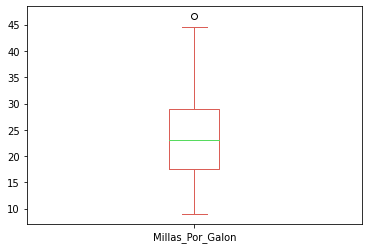

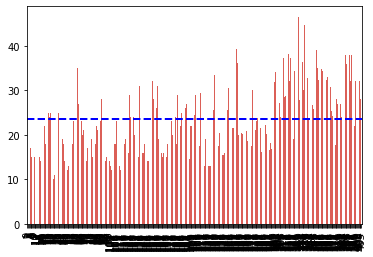

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


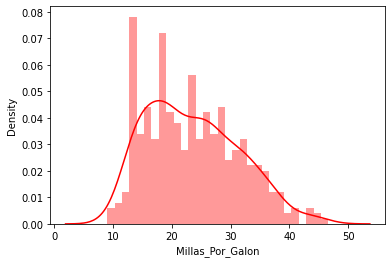

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats


def Cajas(data):
  """Grafico de cajas y bigotes"""

  data.plot.box()
  plt.show()

def Barras(data):
  """Obtiene el grafico de barras de la media"""

  #Grafica de barras de la variable
  data.plot(kind = 'bar')

  #Dibuja la linea de media de la variable
  plt.axhline(data.mean(), linestyle='--', linewidth=2.0,color='blue')
  
  plt.show();
  

def Histograma(data):
  """"Obtiene el Histograma de la columna"""

  sns.set_palette ("hls") # Establezca el color de todas las imágenes, use el espacio de color hls
  sns.distplot(data,color="r",bins=30,kde=True)
  plt.show()



def Graficos(columna):
  """Obtiene los graficos solicitados"""
  
  Cajas(columna)

  Barras(columna)

  Histograma (columna)

#INDICAR LA COLUMNA QUE SE DESEA GRAFICAR 

columna = data_auto["Millas_Por_Galon"]
#columna = data_auto.loc[:, ["Millas_Por_Galon"]]

print(columna)

#FUNCION QUE REALIZA LOS GRAFICOS 
Graficos(columna)


- Crear  una  función  que  devuelva  un  mapa  de  calor  con  la correlación  de  todas  las  variables  numéricas  (incluye  las generadas), para cada país.

             Millas_Por_Galon  Cilindros  ...          C4        C5
Pais_Origen                               ...                      
Europe              27.891429   4.150685  ...   54.752429  0.682429
Japan               30.450633   4.101266  ...   51.200000  0.596835
USA                 20.083534   6.283465  ...  117.013815  2.554378

[3 rows x 11 columns]


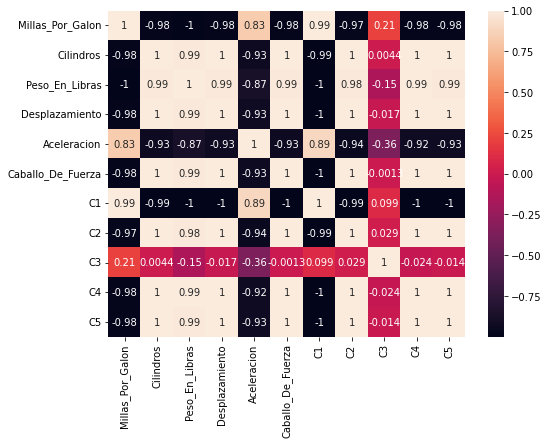

In [ ]:
#OPCION 1 
#SE AGRUPAN TODOS LOS DATOS POR PAIS DE ORIGEN Y SE OBTIENE SU MEDIA DE LOS DATOS AGRUPADOS 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

#GENERAR FUNCION QUE DESPLIEGUE EL GRAFICO POR PAIS 

def grafico(data):
  
  #Obtiene la lista del indice del DataFrame
  
  plt.figure(figsize=(8,6))
  correlacion = data.corr()
  sns.heatmap(correlacion,
            xticklabels = correlacion.columns.values,
            yticklabels = correlacion.columns.values,
            annot = True
            );
  
  #aux = data.index[:].tolist()
  #print(aux)

  #for item in aux:
    #Genera el gráfico de calor para cada país de origen
    
    #print("Pais de Origen: ", item)
    #aux2 = data.loc[item].T
    #print(aux2)
    
    #plt.figure(figsize=(8,6))
    #correlacion = aux2.corr()
    #sns.heatmap(correlacion,
            #xticklabels = correlacion.columns.values,
            #yticklabels = correlacion.columns.values,
            #annot = True
            #);
    #print(data.loc[item])
    

  pass


#SE GENERA EL DATAFRAME "DATA2" CON LOS DATOS DEL PAIS DE ORIGEN Y LAS VARIABLES NUMERICAS 
columnas = ["Millas_Por_Galon","Pais_Origen","Cilindros","Peso_En_Libras","Desplazamiento","Aceleracion","Caballo_De_Fuerza","C1","C2","C3","C4","C5"]
data2 = data_auto[columnas]
#print(data2.head())

#SE AGRUPAN LOS DATOS DE TODAS LAS VARIABLES NUMERICAS (MEDIA) EN RELACION AL PAIS DE ORIGEN  
data3 = data2.groupby("Pais_Origen").mean()

print(data3)


#data3.iloc[1]
#data3.loc["Europe"]
#print(data3.index[:].tolist())

#DIBUJA LOS GRAFICOS DE CALOR DE ACUERDO A CADA PAIS 

grafico(data3)

- Crear  una  función  que  devuelva  un  mapa  de  calor  con  la correlación  de  todas  las  variables  numéricas  (incluye  las generadas), para cada país.

     Millas_Por_Galon Pais_Origen  Cilindros  ...  C3      C4    C5
0                18.0         USA          8  ...   5  123.32  3.56
1                15.0         USA          8  ...   5  159.08  4.27
2                18.0         USA          8  ...   5  123.32  3.56
3                16.0         USA          8  ...   5  144.27  4.00
4                17.0         USA          8  ...   5  132.67  3.76
..                ...         ...        ...  ...  ..     ...   ...
400              27.0         USA          4  ...   5   52.37  0.59
401              27.0         USA          4  ...   5   52.37  0.59
403              32.0         USA          4  ...   5   48.09  0.50
404              28.0         USA          4  ...   5   51.39  0.57
405              31.0         USA          4  ...   5   48.84  0.52

[254 rows x 12 columns]


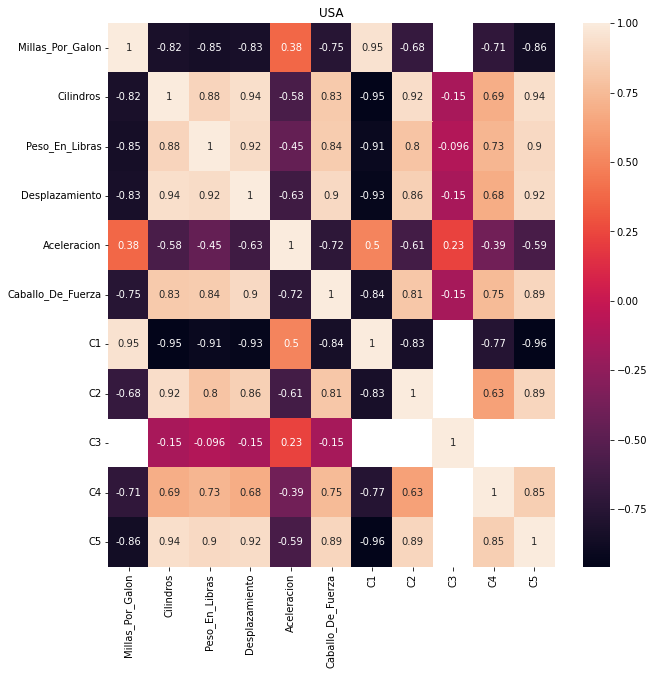

     Millas_Por_Galon Pais_Origen  Cilindros  ...  C3     C4    C5
10                NaN      Europe          4  ...   3    NaN   NaN
25               26.0      Europe          4  ...   5  53.42  0.62
26               25.0      Europe          4  ...   5  54.57  0.64
27               24.0      Europe          4  ...   5  55.81  0.67
28               25.0      Europe          4  ...   5  54.57  0.64
..                ...         ...        ...  ...  ..    ...   ...
366              28.1      Europe          4  ...   5  51.30  0.57
367               NaN      Europe          4  ...   3    NaN   NaN
368              30.7      Europe          6  ...   5  61.26  1.17
383              36.0      Europe          4  ...   5  45.51  0.44
402              44.0      Europe          4  ...   5  41.70  0.36

[73 rows x 12 columns]


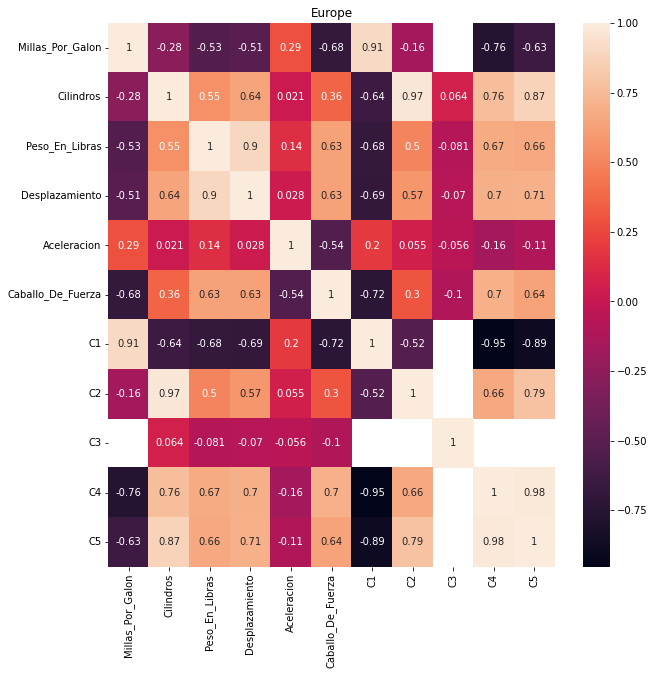

     Millas_Por_Galon Pais_Origen  Cilindros  ...  C3     C4    C5
20               24.0       Japan          4  ...   5  55.81  0.67
24               27.0       Japan          4  ...   5  52.37  0.59
35               27.0       Japan          4  ...   5  52.37  0.59
37               25.0       Japan          4  ...   5  54.57  0.64
60               31.0       Japan          4  ...   5  48.84  0.52
..                ...         ...        ...  ...  ..    ...   ...
390              34.0       Japan          4  ...   5  46.73  0.47
391              38.0       Japan          4  ...   5  44.42  0.42
392              32.0       Japan          4  ...   5  48.09  0.50
393              38.0       Japan          4  ...   5  44.42  0.42
398              32.0       Japan          4  ...   5  48.09  0.50

[79 rows x 12 columns]


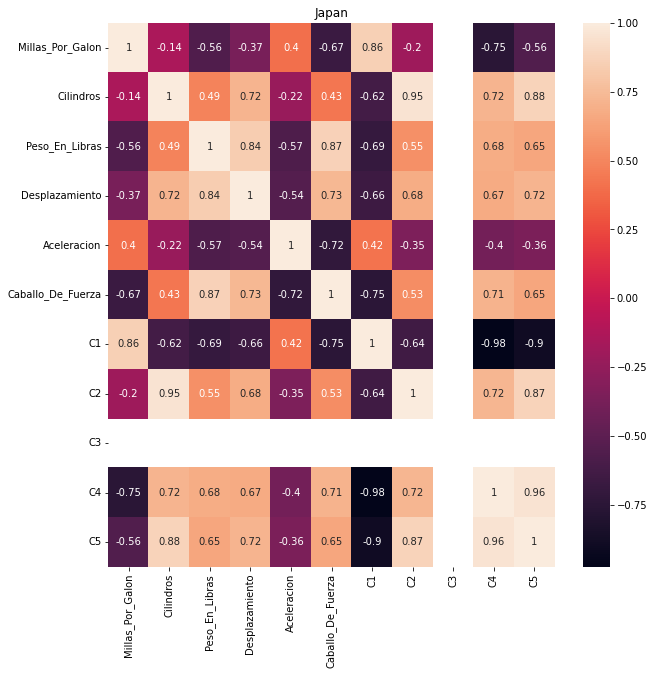

In [ ]:
#OPCION 2 
#GENERAR UN FILTRADO DE DATOS DE ACUERDO AL PAIS DE ORIGEN 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

def grafico(data):

  """FUNCION QUE GENERA LOS GRAFICOS DE CALOR POR CADA PAIS DE ORIGEN"""
  
  #OBTENER LOS VALORES UNICOS DE LA COLUMNA PAIS DE ORIGEN 
  pais = data["Pais_Origen"].unique().tolist()
  #print(pais)
  
  for item in pais:

    #GENERAR UN FILTRADO DE DATOS POR PAIS DE ORIGEN 
    
    
    fs = [item]
    df1 = data[data["Pais_Origen"].isin(fs)]
    print(df1)

    #GENERAR UN GRAFICO DE CALOR DE TODAS LAS VARIABLES CUANTITATIVAS POR CADA PAIS DE ORIGEN 
    
    #plt.figure(figsize=(8,6))
    plt.figure(figsize=(10,10))
    correlacion = df1.corr()
    p = sns.heatmap(correlacion,
            xticklabels = correlacion.columns.values,
            yticklabels = correlacion.columns.values,
            annot = True
            );
    p.set(title = item) #coloca el titulo al gráico
    plt.show()

  pass




#SE GENERA EL DATAFRAME "DATA2" CON LOS DATOS DEL PAIS DE ORIGEN Y LAS VARIABLES NUMERICAS 
columnas = ["Millas_Por_Galon","Pais_Origen","Cilindros","Peso_En_Libras","Desplazamiento","Aceleracion","Caballo_De_Fuerza","C1","C2","C3","C4","C5"]
data2 = data_auto[columnas]
data2
#print(data2.head())


#FUNCION QUE GENERA LOS GRAFICOS DE CALOR POR CADA PAIS DE ORIGEN 
grafico(data2)

